In [0]:
import numpy as np
np.random.seed(1337)  # for reproducibility

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Conv1D, MaxPooling2D, GlobalMaxPooling1D
from keras.utils import np_utils
import pandas as pd
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pylab as plt
import pickle
import os

Using TensorFlow backend.


In [3]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
!cd / && mkdir -p "/content/gdrive/My Drive/neural_networks/hw1/problem3/models"
!cd / && mkdir -p "/content/gdrive/My Drive/neural_networks/hw1/problem3/datasets"

File ‘/content/gdrive/My Drive/neural_networks/hw1/problem3/datasets/amazon.csv’ already there; not retrieving.


In [0]:
os.chdir('/content/gdrive/My Drive/neural_networks/hw1/problem3')
data = pd.read_csv('datasets/amazon.csv').values

data = data[data[:, 6] != 3]

X, Y = data[:, 11], ((data[:, 6] > 3) + 0)

from sklearn.model_selection import train_test_split

raw_x_train, raw_x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [0]:
words = {}
for comment in raw_x_train:
  for raw_word in comment.split(' '):
    word = raw_word.lower()
    if words.get(word) is None:
      words[word] = 1
    else:
      words[word] = words[word] + 1  

In [0]:
sorted_words = list(map(lambda x: x[0], sorted(words.items(), reverse=True, key=lambda x: x[1])))
# sorted_words = list(map(lambda x: x[0], words.items()))
dictionary = {}
i = 0
for word in sorted_words:
  i = i + 1
  dictionary[word] = i
#   if i == 100:
#     break

In [0]:
import json

with open('dictionary.json', 'w') as f:
  json.dump(dictionary, f)

In [0]:
with open('dictionary.json', 'r') as f:
  dictionary = json.load(f)

In [0]:
max_comment_len_in_words = 100
x_train = np.zeros((len(raw_x_train), max_comment_len_in_words), dtype=(int, int))
for i in range(0, len(raw_x_train)):
  comment = raw_x_train[i]
  comment_words = comment.split(' ')
  offset = 0
  for j in range(0, min(len(comment_words), max_comment_len_in_words)):
    while (j + offset) < len(comment_words) and dictionary.get(comment_words[j + offset].lower()) is None:
      offset = offset + 1
    if j + offset == len(comment_words):
      break
    x_train[i][j] = dictionary.get(comment_words[j + offset].lower(), 0)
    

x_test = np.zeros((len(raw_x_test), max_comment_len_in_words), dtype=(int, int))
for i in range(0, len(raw_x_test)):
  comment = raw_x_test[i]
  comment_words = comment.split(' ')
  offset = 0
  for j in range(0, min(len(comment_words), max_comment_len_in_words)):
    while (j + offset) < len(comment_words) and dictionary.get(comment_words[j + offset].lower(), 0) == 0:
      offset = offset + 1
    if j + offset == len(comment_words):
      break
    x_test[i][j] = dictionary.get(comment_words[j + offset].lower(), 0)

In [11]:

print(x_test[0])
print(raw_x_test[0])

[   7  124 2809  815 3172 6104 2531 1417    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
product wonder drizzl pizza mediocr magnific mere moment


In [12]:
model = Sequential()

model.add(Embedding(len(dictionary) + 1, output_dim=1, input_length=max_comment_len_in_words))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(Conv1D(16, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(12, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.SGD(lr=.01, momentum=0.5),
              metrics=['accuracy'],
)

In [0]:
def learning_rate_scheduler(epoch, lr):
  decay_rate = 0.2
  if epoch:
    return lr * decay_rate
  return lr

In [15]:
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint

history = model.fit(
    x_train,
    y_train,
    batch_size=30,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[
        LearningRateScheduler(learning_rate_scheduler, verbose=1),
#         ReduceLROnPlateau(monitor='val_acc', verbose=1, patience=2),
        ModelCheckpoint('models/modelcheckpoint-{epoch:02d}', save_best_only=False),
        ModelCheckpoint('models/modelcheckpoint-best', monitor='val_acc',save_best_only=True),
    ],
)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 45000 samples, validate on 5000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.009999999776482582.
45000/45000 [==============================] - 9s 191us/step - loss: 0.4533 - acc: 0.8351 - val_loss: 0.4368 - val_acc: 0.8418
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0019999999552965165.
45000/45000 [==============================] - 6s 131us/step - loss: 0.4470 - acc: 0.8351 - val_loss: 0.4359 - val_acc: 0.8418
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0003999999724328518.
45000/45000 [==============================] - 6s 132us/step - loss: 0.4467 - acc: 0.8351 - val_loss: 0.4359 - val_acc: 0.8418
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 7.999999215826393e-05.
45000/45000 [==============================] - 6s 135us/step - lo

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 1)            23965     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 64)            256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 32)            6176      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 94, 16)            1552      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total para

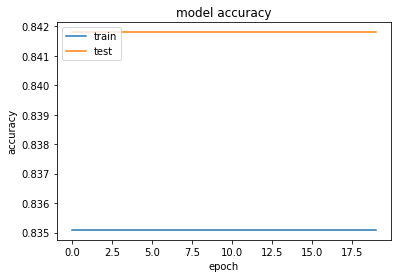

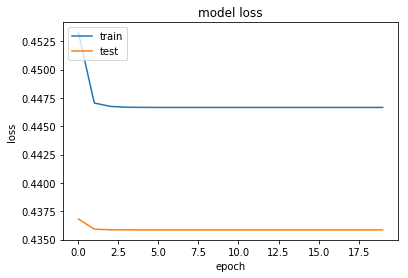

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()